# Example of Regression Trees on the California Housing Dataset

In this notebook we use the **regression tree** class from **rice_ml.supervised_learning.regression_tree** 
The dataset we use is the California housing dataset from **sklearn**
The goal is to clearly illustrate how a regression tree behaves on real data

## 1) Imports and Dependencies

We use:
- `numpy` for numerical computation
- `matplotlib` for visualization
- `scikit-learn` utilities for dataset loading, splitting, and metrics
- The `regression_tree` class from `rice_ml` for modeling

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Import your custom model
from rice_ml.supervised_learning.regression_tree import regression_tree

## 2) The California Housing Dataset

The California housing dataset contains aggregated census data at the block level.

**Features include:** median income, house age, number of rooms, population, latitude, longitude, and more.

**Target:** median house value (in units of $100,000).

In [2]:
data = fetch_california_housing()

X = data.data
y = data.target
feature_names = data.feature_names

X.shape, y.shape

((20640, 8), (20640,))

We can also import the california housing data as a data frame to better see what it looks like in tabular form

In [3]:
df = fetch_california_housing(as_frame=True)
df.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## 3) Train/Test Split
We split the dataset into a training set and a test set so that we can evaluate how well the regression tree generalizes to unseen data.
We split the data using scikit-learn’s `train_test_split` utility with `test_size=0.3`

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

X_train.shape, X_test.shape

((14448, 8), (6192, 8))

## 4) Training the Regression Tree

We begin with a **shallow tree** to reduce overfitting. The key hyperparameters are:
- `max_depth`, which limits how deep the tree can grow and therefore controls model complexity;
- `min_samples_leaf`, which enforces a minimum number of samples in each leaf and helps prevent overfitting.



In [5]:
tree = regression_tree(
    max_depth=5,
    min_samples_leaf=20,
    random_state=0
)

tree.fit(X_train, y_train)

## 4) Model Performance

We evaluate the regression tree using the **R-squared (R²)** metric.

R² measures the proportion of variance in the target variable that is explained by the model:
- R² = 1 indicates perfect predictions;
- R² = 0 corresponds to predicting the mean of the target;
- negative values indicate worse-than-mean predictions.

Comparing training and test R² values helps diagnose underfitting and overfitting. Here we see our training R² is higher than our testing R².

In [6]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train R²: {train_r2:.3f}")
print(f"Test  R²: {test_r2:.3f}")

Train R²: 0.631
Test  R²: 0.603


## 5) Feature Importances

Regression trees naturally provide **interpretable feature importances** based on total reduction in mean squared error.

Below we visualize which features the tree relied on most.

Higher bars correspond to features that the tree relied on more heavily when making splits.

In this dataset, median income is typically one of the most important features because it is strongly correlated with housing prices.



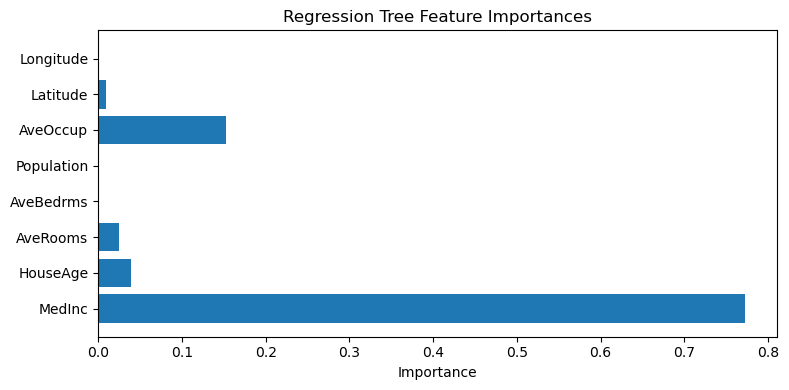

In [7]:
importances = tree.feature_importances_

plt.figure(figsize=(8, 4))
plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.title("Regression Tree Feature Importances")
plt.tight_layout()
plt.show()

## 6) Effect of Tree Depth

To illustrate the **bias–variance tradeoff**, we train trees with increasing depth and evaluate train and test R² scores.

- Shallow trees → high bias
- Deep trees → high variance
- Optimal depth → best generalization

This experiment illustrates the bias–variance tradeoff inherent in decision tree models.

In [8]:
depths = range(1, 21)
train_scores = []
test_scores = []

for d in depths:
    model = regression_tree(
        max_depth=d,
        min_samples_leaf=20,
        random_state=0
    )
    model.fit(X_train, y_train)

    train_scores.append(r2_score(y_train, model.predict(X_train)))
    test_scores.append(r2_score(y_test, model.predict(X_test)))

## 7) Bias–Variance Tradeoff Plot
As tree depth increases, training R² typically increases because the model becomes more flexible.

Test R² usually improves at first, then plateaus or decreases as the tree begins to overfit.

A reasonable choice for `max_depth` is often near the peak of the test R² curve. Regularization can also be achieved by increasing `min_samples_leaf` or otherwise limiting tree growth.

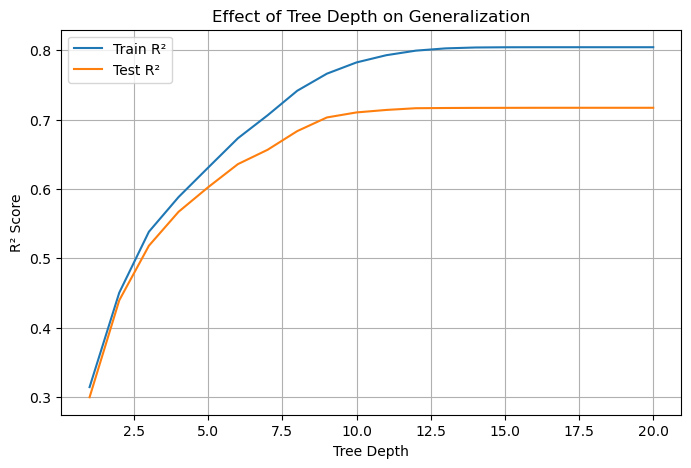

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(depths, train_scores, label="Train R²")
plt.plot(depths, test_scores, label="Test R²")
plt.xlabel("Tree Depth")
plt.ylabel("R² Score")
plt.title("Effect of Tree Depth on Generalization")
plt.legend()
plt.grid(True)
plt.show()